# Problem 1

The task is to help John from STA IT services to create a linear regression model in Python or R to predict the CTC/Salary of new hires from the data provided. Here is a snapshot of the case

![alt text](https://lh4.googleusercontent.com/u__xeeu1G_1FdLwOrlo8pLpeecf4RJ8gLO08d3B89B_4_wH-FpdBQAIasvfsjTY-wh4vaOzz3WV6GpOOgems0oabvee0VnOHwUf4vHmWceYvr6n5bI8kN-cYG-ombFBLLpGvNUFS)

In [1]:
import numpy as np
import pandas as pd

In [2]:
employ_df = pd.read_excel('Data_file.xlsx', index_col=0, header=2)

In [3]:
employ_df.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [4]:
employ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.1+ KB


There are no null values present in the dataset.

In [5]:
employ_df.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


There doesn't seem to be any outlier in this dataset. Now let's try to visualize this dataset.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cont_cols = ['Previous CTC', 'Graduation marks', 'Exp (Months)', 'CTC']
discrete_cols = ['Role', 'City type', 'Previous job changes', 'College']

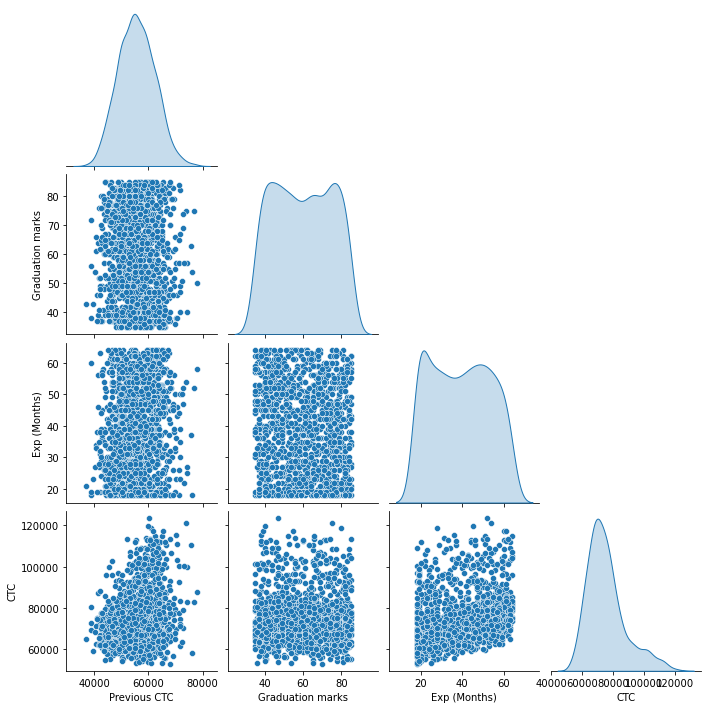

In [8]:
sns.pairplot(employ_df[cont_cols], corner=True, diag_kind='kde')

Target variable is left skewed. And there doesn't seem to be any correlation between continous varibles.

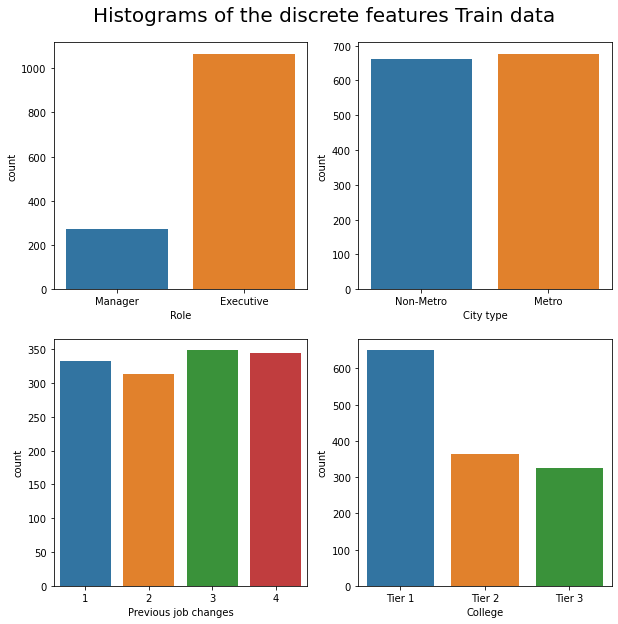

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax, col in zip(axs.flatten(), discrete_cols):
    sns.countplot(x=col, data=employ_df, ax=ax)

plt.suptitle('Histograms of the discrete features Train data', y=0.93, fontsize=20)
plt.show()

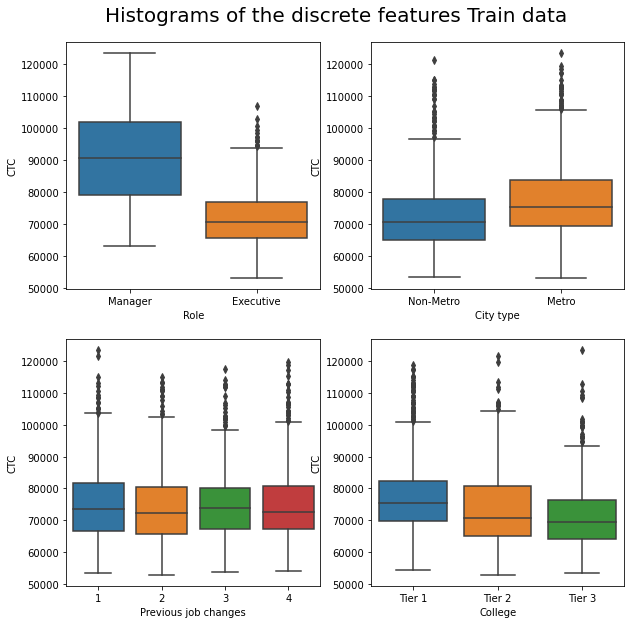

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax, col in zip(axs.flatten(), discrete_cols):
    sns.boxplot(x=col,y='CTC', data=employ_df, ax=ax)

plt.suptitle('Histograms of the discrete features Train data', y=0.93, fontsize=20)
plt.show()

Average CTC for manager role is much higher than executive role. Candidates from metro cities also got slightly higher salary than ones from non-metro cities. Previous job changes doesn't seem to affect CTC much. Candidates from Tier 1 colleges have gottes highest avg CTC followed by Tier 2 and ones from Tier 3 colleges have the lowest avg CTC.

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
# encoding role and city type features using ordinal encoding method
encoder = OrdinalEncoder(handle_unknown='ignore', categories=[['Executive', 'Manager'], ['Non-Metro', 'Metro']])
encoder.fit(employ_df[['Role', 'City type']])
encoder.categories_

[array(['Executive', 'Manager'], dtype=object),
 array(['Non-Metro', 'Metro'], dtype=object)]

In [13]:
employ_df[['Role', 'City type']] = encoder.transform(employ_df[['Role', 'City type']])

In [14]:
# encoding College feature using one-hot encoding method

from sklearn.preprocessing import OneHotEncoder
oneencoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(oneencoder.fit_transform(employ_df[['College']]).toarray())
enc_df.set_axis(list(oneencoder.get_feature_names(['College'])), axis=1, inplace=True)
enc_df.index+=1 
employ_df = employ_df.join(enc_df)

In [15]:
# Scaling previous ctc feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(employ_df[['Previous CTC']])
employ_df[['Previous CTC']] = scaler.transform(employ_df[['Previous CTC']])

In [16]:
employ_df

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3
S.No.,,,,,,,,,,,
1,Tier 1,1.0,0.0,0.452897,3,66,19,71406.576531,1.0,0.0,0.0
2,Tier 2,0.0,1.0,0.490970,1,84,18,68005.870631,0.0,1.0,0.0
3,Tier 2,0.0,1.0,0.570783,2,52,28,76764.020277,0.0,1.0,0.0
4,Tier 3,0.0,1.0,0.293737,2,81,33,82092.386880,0.0,0.0,1.0
5,Tier 3,0.0,1.0,0.510471,4,74,32,73878.097729,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1334,Tier 3,0.0,1.0,0.554019,4,68,50,69712.403655,0.0,0.0,1.0
1335,Tier 1,0.0,0.0,0.408690,1,67,18,69298.750099,1.0,0.0,0.0
1336,Tier 2,0.0,0.0,0.610127,1,47,18,66397.770686,0.0,1.0,0.0


In [17]:
x_train = employ_df.drop(['CTC', 'College'], axis=1)
y_train = employ_df.CTC
x_train.head(1)

,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 1,College_Tier 2,College_Tier 3
S.No.,,,,,,,,,
1,1.0,0.0,0.452897,3,66,19,1.0,0.0,0.0


CTC                     1.000000
Role                    0.625435
Exp (Months)            0.301569
Previous CTC            0.270260
City type               0.211258
College_Tier 1          0.165249
Previous job changes    0.007518
Graduation marks       -0.017557
College_Tier 2         -0.041814
College_Tier 3         -0.149194
Name: CTC, dtype: float64


<AxesSubplot:>

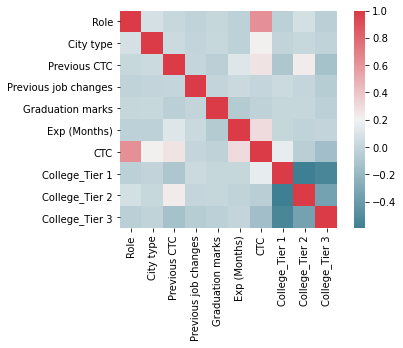

In [18]:
# calculating correlation between variables
corr = employ_df.corr()
print(corr['CTC'].sort_values(ascending=False))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [19]:
# checking mutual information between features
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x_train, y_train, list(x_train.columns))
mi_scores.sort_values(ascending=False) # show a few features with their MI scores

Role                    0.193886
Exp (Months)            0.103045
College_Tier 1          0.058073
City type               0.052442
College_Tier 3          0.017979
College_Tier 2          0.017949
Previous CTC            0.001860
Previous job changes    0.000000
Graduation marks        0.000000
Name: MI Scores, dtype: float64

Features `Previous job changes`, `Graduation marks` are not seems to be helpfull in prediction. So I am going to drop them.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
x_train = x_train.drop(['Previous job changes', 'Graduation marks'], axis=1)

In [24]:
# Create and train the model
model = LinearRegression().fit(x_train, y_train)

# Generate predictions
predictions_test = model.predict(x_train)

# Compute loss to evalute the model
loss = mean_squared_error(y_train, predictions_test, squared=False)
print('Test Loss:', loss)

Test Loss: 7853.785188299259


In [25]:
import pandas as pd
weights_df = pd.DataFrame({
    'feature': np.append(x_train.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
7,1,50116.955232
0,Role,19359.583843
2,Previous CTC,18492.050192
1,City type,4078.706137
4,College_Tier 1,3381.188920
3,Exp (Months),259.096166
6,College_Tier 3,-1270.268820
5,College_Tier 2,-2110.920100
